# K Nearest Neighbour Algorithm
Type - Supervise Learning Algorithm
Task - Classification and Regression

Remember that, KNN is a:

   1.**Non-Parametric Algorithm**, meaning it doesn't make assumptions about the underlying data distribution.

   2.**Lazy Learning Algorithm**, meaning it doesn't learn a model during the training phase. Instead, it makes predictions based on the majority class or average value of its k-nearest neighbors.

**Algorithm Workflow**

1.**Training Phase -**

    . KNN doesn't have a training phase as it memorizes the entire training dataset.
    . Choose k (i.e. Number of Nearest Neighbours).
    . Choose a distance metric.
    # Code implementation
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',  p=2)

2.**Prediction Phase -**

     . **Similarity Calculation** - For each new query data point, the algorithm calculates the distance to all other points in the training set.
     . Select the k nearest neighbors based on the calculated distances.
     . **Majority Vote (Classification) or Average (Regression)** - In classification, the algorithm assigns the class label that is most common among its k neighbors. In regression, it predicts the average target value of its k neighbors.
     # Code Implementation
     classifier.predict(X_test_transformed)

**Use Cases -**

KNN is used in various applications, including handwriting recognition, image classification, recommendation systems, and medical diagnosis.

**Important Note -**

The performance of the k-Nearest Neighbors (KNN) algorithm can be affected by the presence of outliers and missing data. Let's discuss how outliers and missing data can impact KNN.

    1.Outliers can significantly impact distance calculations, especially if the distance metric is sensitive to extreme values. For example, the Euclidean distance is sensitive to outliers.
    2.Missing data can affect the calculation of distances between data points. If features have missing values, it can lead to biased distance computations.

     **Mitigating this Issue **- The performance of KNN can be sensitive to outliers and missing data, but with proper data preprocessing, appropriate handling of missing values, and careful selection of distance metrics, it is possible to improve the robustness of the algorithm in the presence of such challenges.
     
# Loading the Data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
Path='/content/fashion-mnist_train.csv'

In [13]:
df=pd.read_csv(Path)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.shape

(2839, 785)

In [15]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    1
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Length: 785, dtype: int64

<Axes: xlabel='label', ylabel='count'>

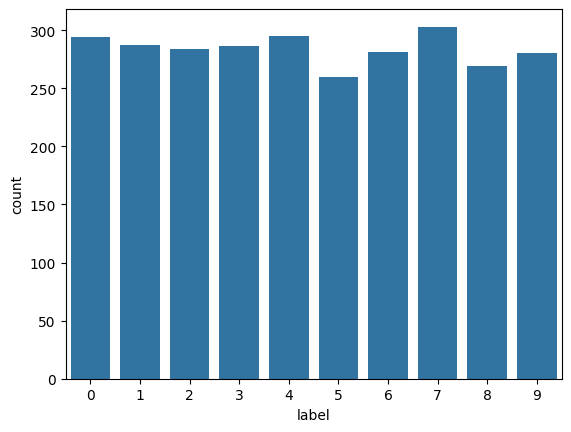

In [16]:
sns.countplot(data=df,x='label')

# About the dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

            **  Label	**   **Fashion Product**
                 0	          T-shirt/top
                 1	          Trouser
                 2	          Pullover
                 3            Dress
                 4	          Coat
                 5	          Sandal
                 6	          Shirt
                 7	          Sneaker
                 8	          Bag
                 9	          Ankle boot

In [17]:
X=df.drop('label',axis=1)
y=df['label']

0


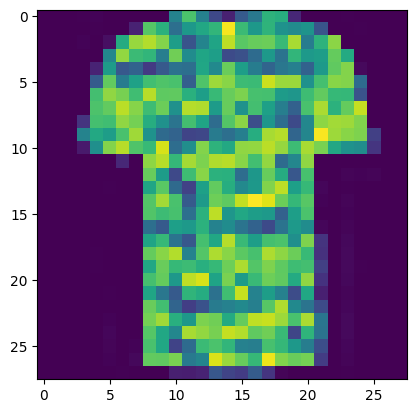

In [18]:
idx=3
print(y[idx])
img=np.reshape(X.values[idx],(28,28))
plt.imshow(img)


3


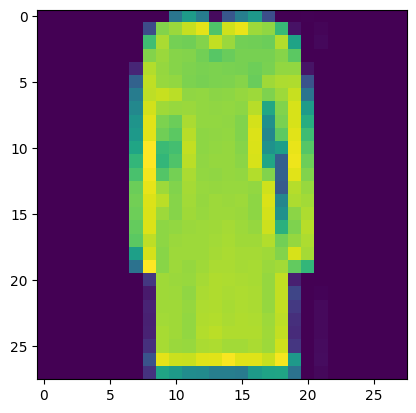

In [19]:
idx= np.random.choice(np.where(y==3)[0])
print(y[idx])
img=np.reshape(X.values[idx],(28,28))
plt.imshow(img)

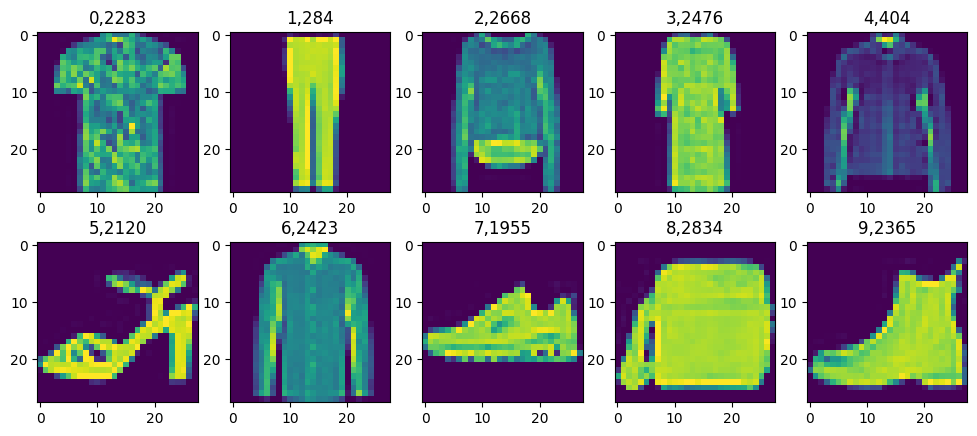

In [20]:
plt.figure(figsize=(12,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  idx=np.random.choice(np.where(y==i)[0])
  plt.title(f'{y[idx]},{idx}')
  img_grid=np.reshape(X.values[idx],(28,28))
  plt.imshow(img_grid)

In [21]:
item_dictionary = {0: 't-shirt/top', 1: 'trouser',
                   2: 'pullover', 3: 'dress',
                   4: 'coat', 5: 'sandal',
                   6: 'shirt', 7: 'sneaker',
                   8: 'bag', 9: 'ankle_boot'}


In [22]:
y=y.map(item_dictionary)

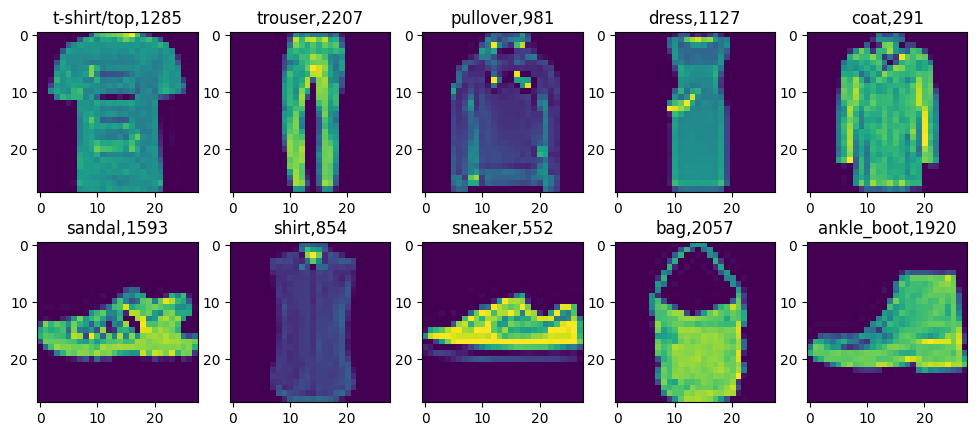

In [23]:
plt.figure(figsize=(12,5))
for i in item_dictionary :
  plt.subplot(2,5,i+1)
  idx=np.random.choice(np.where(y==item_dictionary[i])[0])
  plt.title(f'{y[idx]},{idx}')
  img_grid=np.reshape(X.values[idx],(28,28))
  plt.imshow(img_grid)

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
imputer=SimpleImputer(strategy='mean')
# Fit and transform the imputer on your data
X_imputed = imputer.fit_transform(X)
pca=PCA(n_components=2)
X_low_dim= pca.fit_transform(X_imputed)
print(X_low_dim[:5])

[[  964.49717048  1276.06019452]
 [-1093.51601763  1000.6304457 ]
 [ 1881.49372107   400.23058985]
 [  855.01023077  -601.78534971]
 [ 1065.40229043 -1022.56803191]]


In [25]:
df_low_dim=pd.DataFrame(X_low_dim,columns=['feature_1','feature_2'])
df_low_dim['y']=y
df_low_dim.head()

,feature_1,feature_2,y
0,964.497170,1276.060195,pullover
1,-1093.516018,1000.630446,ankle_boot
2,1881.493721,400.230590,shirt
3,855.010231,-601.785350,t-shirt/top
4,1065.402290,-1022.568032,dress


<Axes: xlabel='feature_1', ylabel='feature_2'>

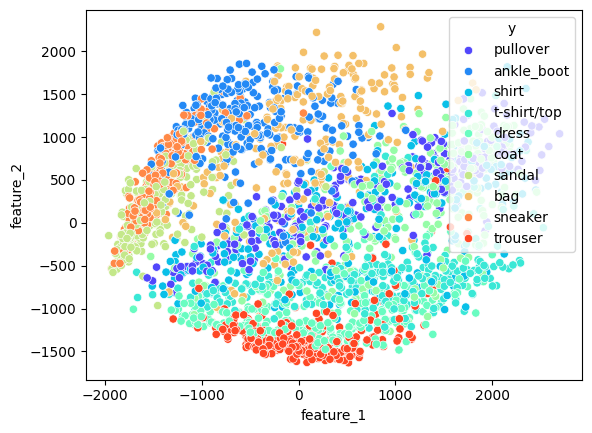

In [26]:
sns.scatterplot(df_low_dim, x='feature_1',y='feature_2',hue='y',palette='rainbow')

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Building the Model

    . n_neighbors is the number of nearest neighbors to look at

    . **n_neighbors is the hyperparameter** of KNN
    . **p is a hyperparameter**  of KNN for metric=minkowski
               . p = 1 refers to Manhattan Distance
               . p = 2 refers to Euclidean Distance
               . p > 3 is Minkowski Distance Metric

  **Other Pairwise Distance Metrics Allowed**

                        ** metric**	            ** Function**
                      'cityblock'	   metrics.pairwis manhattan_distances
                      'cosine'	     metrics.pairwise.cosine_distances
                      'euclidean'	   metrics.pairwise.euclidean_distances
                      'haversine'	   metrics.pairwise.haversine_distances
                       'l1'        	 metrics.pairwise.manhattan_distances
                       'l2'	         metrics.pairwise.euclidean_distances
                      'manhattan'	   metrics.pairwise.manhattan_distances
                    'nan_euclidean'	 metrics.pairwise.nan_euclidean_distances

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,n_jobs=-1)
X_imputed_train=imputer.fit_transform(X_train)
X_imputed_test=imputer.fit_transform(X_test)
classifier.fit(X_imputed_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [29]:
# Classes known to classifier
classifier.classes_

array(['ankle_boot', 'bag', 'coat', 'dress', 'pullover', 'sandal',
       'shirt', 'sneaker', 't-shirt/top', 'trouser'], dtype=object)

In [30]:
# Knowing the distance metric used
classifier.effective_metric_

'euclidean'

In [31]:
# Number of features seen by algo during training
classifier.n_features_in_

784

In [32]:
# Names of features seen during training
# Assuming X_train is your training feature data
feature_names = X_train.columns.tolist()  # Assuming X_train is a DataFrame
feature_names


['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

# Testing the Model Performance

In [33]:
%%time
# Prediction on unseen datapoints
y_test_predict=classifier.predict(X_imputed_test)

CPU times: user 322 ms, sys: 14.8 ms, total: 337 ms
Wall time: 359 ms


In [34]:
# Calculate accuracy of class predictions

from sklearn import metrics
metrics.accuracy_score(y_test_predict,y_test)

0.7845070422535211

# Training KNN with Manhattan Distance Metric

In [35]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(metric='minkowski', p=1, n_jobs=-1)
classifier.fit(X_imputed_train, y_train)

y_test_pred = classifier.predict(X_imputed_test)

print(f"Model's accuracy trained using KNN with {classifier.effective_metric_} distance metrics is {metrics.accuracy_score(y_test, y_test_pred)}.")

Model's accuracy trained using KNN with manhattan distance metrics is 0.8056338028169014.
CPU times: user 2.52 s, sys: 6.96 ms, total: 2.52 s
Wall time: 2.01 s


# Training KNN with Minkowski Distance Metric

In [36]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier=KNeighborsClassifier(metric='minkowski',p=3,n_jobs=-1)
classifier.fit(X_imputed_train,y_train)

y_test_pred= classifier.predict(X_imputed_test)

print(f"Model's accuracy trained using KNN with {classifier.effective_metric_} distance metrics is {metrics.accuracy_score(y_test, y_test_pred)}.")


Model's accuracy trained using KNN with minkowski distance metrics is 0.780281690140845.
CPU times: user 36.3 s, sys: 33.4 ms, total: 36.3 s
Wall time: 23.3 s


# Training KNN with Cosine Distance Metric

In [38]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier=KNeighborsClassifier(metric='cosine',n_jobs=-1)
classifier.fit(X_imputed_train,y_train)

y_test_pred=classifier.predict(X_imputed_test)

print(f"Model's accuracy trained using KNN with {classifier.effective_metric_} distance metrics is {metrics.accuracy_score(y_test, y_test_pred)}.")


Model's accuracy trained using KNN with cosine distance metrics is 0.8028169014084507.


# Other Performance Metrics

In [40]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

  ankle_boot       0.73      0.95      0.82        74
         bag       0.94      0.99      0.96        68
        coat       0.68      0.84      0.75        80
       dress       0.85      0.90      0.87        77
    pullover       0.74      0.69      0.71        67
      sandal       1.00      0.41      0.59        70
       shirt       0.59      0.51      0.55        57
     sneaker       0.79      0.96      0.87        74
 t-shirt/top       0.82      0.82      0.82        66
     trouser       1.00      0.88      0.94        77

    accuracy                           0.80       710
   macro avg       0.81      0.79      0.79       710
weighted avg       0.82      0.80      0.79       710



In [42]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[70,  0,  0,  0,  1,  0,  0,  3,  0,  0],
       [ 0, 67,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 67,  3,  3,  0,  5,  0,  1,  0],
       [ 0,  0,  5, 69,  0,  0,  1,  0,  2,  0],
       [ 0,  0, 16,  1, 46,  0,  4,  0,  0,  0],
       [24,  1,  0,  0,  0, 29,  0, 16,  0,  0],
       [ 0,  0,  8,  1, 11,  0, 29,  0,  8,  0],
       [ 2,  1,  0,  0,  0,  0,  0, 71,  0,  0],
       [ 0,  1,  0,  2,  1,  0,  8,  0, 54,  0],
       [ 0,  0,  1,  5,  0,  0,  2,  0,  1, 68]])

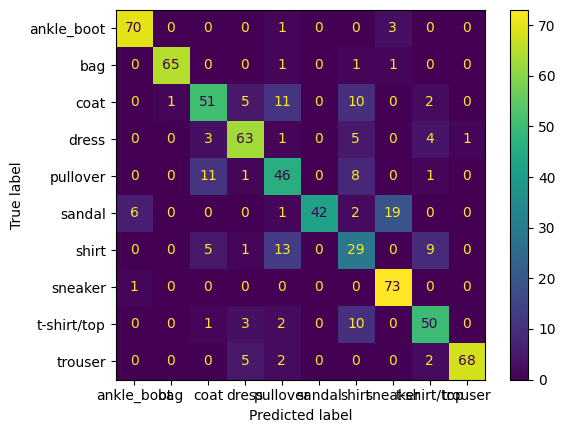

In [44]:
cm=metrics.confusion_matrix(y_test,y_test_predict,labels=classifier.classes_)
fig=metrics.ConfusionMatrixDisplay(cm,display_labels=classifier.classes_)
fig.plot()

In [45]:
actual=np.sum(cm,axis=1).reshape(-1,1)
cmn=np.round(cm/actual,2)
print("Normalized Confusion Matrix:")
print(cmn)

Normalized Confusion Matrix:
[[0.95 0.   0.   0.   0.01 0.   0.   0.04 0.   0.  ]
 [0.   0.96 0.   0.   0.01 0.   0.01 0.01 0.   0.  ]
 [0.   0.01 0.64 0.06 0.14 0.   0.12 0.   0.02 0.  ]
 [0.   0.   0.04 0.82 0.01 0.   0.06 0.   0.05 0.01]
 [0.   0.   0.16 0.01 0.69 0.   0.12 0.   0.01 0.  ]
 [0.09 0.   0.   0.   0.01 0.6  0.03 0.27 0.   0.  ]
 [0.   0.   0.09 0.02 0.23 0.   0.51 0.   0.16 0.  ]
 [0.01 0.   0.   0.   0.   0.   0.   0.99 0.   0.  ]
 [0.   0.   0.02 0.05 0.03 0.   0.15 0.   0.76 0.  ]
 [0.   0.   0.   0.06 0.03 0.   0.   0.   0.03 0.88]]


Text(0.5, 23.38159722222222, 'Predicted')

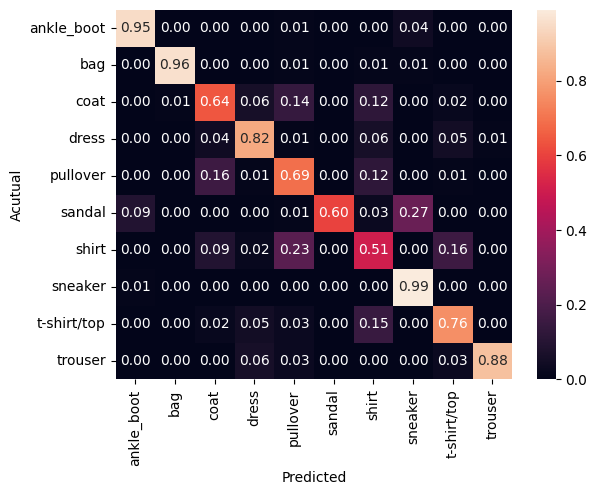

In [47]:
sns.heatmap(cmn,annot=True,fmt='.2f',xticklabels=classifier.classes_,yticklabels=classifier.classes_)
plt.ylabel('Acutual')
plt.xlabel('Predicted')